Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.optimize as opt

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company.
This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Load the Telco Churn data
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information.

In [4]:
churn_data=pd.read_csv("ChurnData.csv")
churn_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


Data pre-processing and selection
Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement by the skitlearn algorithm:

In [5]:
churn_data=churn_data[['tenure','age','address','income','ed','employ','equip','callcard','churn']]
churn_data['churn']=churn_data['churn'].astype(int)
churn_data['churn'].head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

Lets define X, and y for our dataset:

In [6]:
x=np.asanyarray(churn_data[['tenure','age','address','income','ed','employ','equip']])
x[0:6]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.],
       [ 68.,  52.,  17., 120.,   1.,  24.,   0.]])

In [7]:
y=np.asanyarray(churn_data['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

Also, we normalize the dataset:

In [9]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

Train/Test dataset
Okay, we split our dataset into train and test set:

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

Modeling (Logistic Regression with Scikit-learn)
Lets build our model using LogisticRegression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. Now lets fit our model with train set:

In [13]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.04,solver="liblinear").fit(x_train,y_train)
LR

LogisticRegression(C=0.04, solver='liblinear')

In [14]:
yhat=LR.predict(x_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [15]:
yhat_prob=LR.predict_proba(x_test)
yhat_prob

array([[0.600311  , 0.399689  ],
       [0.73878666, 0.26121334],
       [0.66100745, 0.33899255],
       [0.77411696, 0.22588304],
       [0.66344879, 0.33655121],
       [0.61710518, 0.38289482],
       [0.60105514, 0.39894486],
       [0.72923084, 0.27076916],
       [0.3610545 , 0.6389455 ],
       [0.77458496, 0.22541504],
       [0.66786099, 0.33213901],
       [0.72920797, 0.27079203],
       [0.50850149, 0.49149851],
       [0.3920336 , 0.6079664 ],
       [0.77972756, 0.22027244],
       [0.58343146, 0.41656854],
       [0.54687645, 0.45312355],
       [0.53703317, 0.46296683],
       [0.52248269, 0.47751731],
       [0.60538103, 0.39461897],
       [0.74040131, 0.25959869],
       [0.55919266, 0.44080734],
       [0.79319714, 0.20680286],
       [0.53536408, 0.46463592],
       [0.53706205, 0.46293795],
       [0.84988195, 0.15011805],
       [0.58001792, 0.41998208],
       [0.56611559, 0.43388441],
       [0.5819999 , 0.4180001 ],
       [0.86139794, 0.13860206],
       [0.

Evaluation
jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [20]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.26666666666666666

confusion matrix
Another way of looking at accuracy of classifier is to look at confusion matrix.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



In [22]:
score=LR.score(x_test,y_test)
score

0.725

In [27]:
!pip install seaborn

You should consider upgrading via the 'c:\users\sayam jain\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm =metrics.confusion_matrix(y_test,yhat)
print(cm)

[[25  0]
 [11  4]]


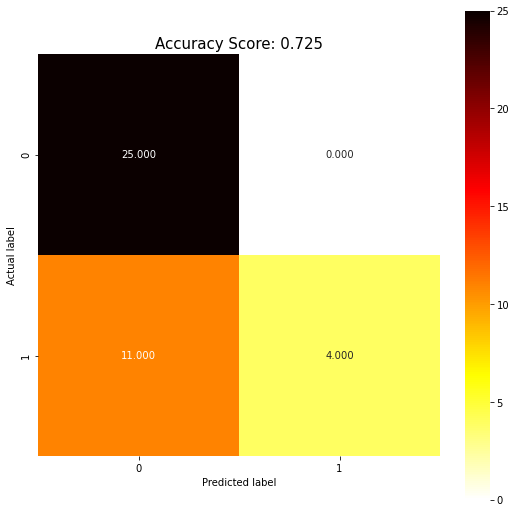

In [32]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt='.3f',square=True,cmap="hot_r")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

plt.show()

log loss
Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

In [35]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.5689577939358672